# TASK 2.3

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np

iris = load_iris()

print(iris.target)

df = pd.DataFrame(iris.data, columns=iris.feature_names)[["sepal length (cm)", "sepal width (cm)"]]

df['is_setosa'] = (iris.target == 0).astype(int)


C:\Users\Gerax\AppData\Local\Temp\ipykernel_25012\2562748008.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [3]:
# 1 Setosa, 0 not setosa
print("- - - - - - - CANTIDAD DE DATOS ( SETOSA / NO SETOSA ) - - - - - - -")
print(df["is_setosa"].value_counts())


print("- - - - - - - VALORES NULLS - - - - - - -")
nulos = df.isnull()
print(nulos)

nulos_por_columna = df.isnull().sum()
print(list(nulos_por_columna))


- - - - - - - CANTIDAD DE DATOS ( SETOSA / NO SETOSA ) - - - - - - -
is_setosa
0    100
1     50
Name: count, dtype: int64
- - - - - - - VALORES NULLS - - - - - - -
     sepal length (cm)  sepal width (cm)  is_setosa
0                False             False      False
1                False             False      False
2                False             False      False
3                False             False      False
4                False             False      False
..                 ...               ...        ...
145              False             False      False
146              False             False      False
147              False             False      False
148              False             False      False
149              False             False      False

[150 rows x 3 columns]
[0, 0, 0]


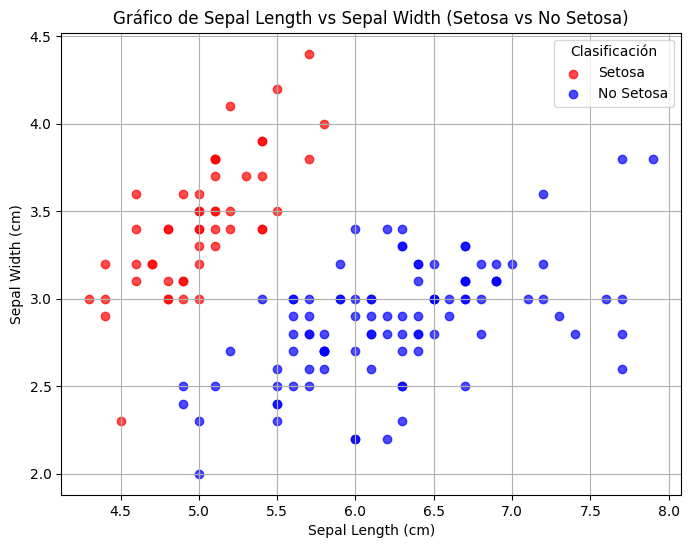

In [4]:
colors = {1: 'red', 0: 'blue'}

plt.figure(figsize=(8, 6))
for label in df['is_setosa'].unique():
    subset = df[df['is_setosa'] == label]
    label_name = "Setosa" if label == 1 else "No Setosa"
    plt.scatter(subset["sepal length (cm)"], subset["sepal width (cm)"], 
                label=label_name, color=colors[label], alpha=0.7)

plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("Gráfico de Sepal Length vs Sepal Width (Setosa vs No Setosa)")
plt.legend(title="Clasificación")
plt.grid(True)


plt.show()

In [ ]:
class Perceptron:

    def __init__(self, n_features, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.w = np.random.rand(n_features)

    def step_function(self, z):
        return 1 if z >= 0 else 0
    
    def predict(self, x):
        z = np.dot(self.w, x)
        return self.step_function(z)

    def fit(self, X, y):
        # Convertir a numpy arrays para poder hacer los calculos :)
        X = X.to_numpy()
        y = y.to_numpy()
        for i in range(self.iterations):
            errors = 0
            for i in range(len(y)):
                y_pred = self.predict(X[i])
                error = y[i] - y_pred
                if error != 0:
                    self.w += self.learning_rate * error * X[i]
                    errors += 1

            if errors == 0:
                break
        

In [ ]:
# se agrega el sesgo a todo el dataset
df["bias"] = 1

# Usar el 80% para entrenar
train = df.sample(frac=0.8, random_state=42)

# Usar el resto (20%) para prueba
test = df.drop(train.index)

# Train
train_y = train.pop('is_setosa')
train_x = train

# Test
test_y = test.pop('is_setosa')
test_x = test

# Se incia la clase Perceptron con las features
perceptron = Perceptron(n_features=len(train_x.keys()))
# se entrena el modelo
perceptron.fit(train_x, train_y)
# se obtienen las predicciones
y_pred = [perceptron.predict(x) for x in test_x.to_numpy()]



In [ ]:
test_y_np = test_y.to_numpy()
y_pred_np = np.array(y_pred)

TP = np.sum((y_pred_np == 1) & (test_y_np == 1))
FP = np.sum((y_pred_np == 1) & (test_y_np == 0))
FN = np.sum((y_pred_np == 0) & (test_y_np == 1))

precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Precisión (Precision): {precision:.2%}")
print(f"Recall (Sensibilidad): {recall:.2%}")
print(f"F1-Score: {f1_score:.2%}")


Precisión (Precision): 87.50%
Recall (Sensibilidad): 100.00%
F1-Score: 93.33%


Al ser un dataset desbalanceado se tomo en cuenta que acurracy no podia ser una metrica de desempeño. 
Las metricas quese utilizaron fueron:
* Precision: para medir cuantos positivos realmente detecto el modelo
* Recall: Para saber cuantos setosos (positivos) detecto de todo el dataset
* F1: Se utilzo para medir el balance entre precision y recall.

Tomando todo esto en cuenta se puede decir que el modelo lo hizo bastante bien, teniendo una deteccion de positivos reales muy buena a pesar de haber un sesgo, siendo no setosos mas presentes en el dataset. El modelo se acoplo bastante bien a los datos para poder predecir.